# **Project Name**    -
## ***Integrated Retail Analytics for Store Optimization***


##### **Project Type**    - EDA + Visualization + ML
##### **Contribution**    - Individual

# **Project Summary -**

The project “Integrated Retail Analytics for Store Optimization and Demand Forecasting” focuses on applying data analytics and machine learning techniques to improve retail operations. The core idea is to use sales, store, and external datasets to understand customer behavior, detect unusual patterns, forecast future demand, and ultimately support better decision-making for marketing, inventory, and store management.

Retail businesses operate in highly competitive environments where customer preferences shift quickly, external economic factors influence buying behavior, and seasonal variations can dramatically affect sales. Traditional decision-making based on intuition or static reports often fails to capture these dynamics. This project aims to address that gap by combining Exploratory Data Analysis (EDA) with predictive modeling and segmentation techniques to deliver actionable insights.

The first phase of the project involves data preprocessing and cleaning. The provided datasets, covering weekly sales, store attributes, markdowns, and external features such as unemployment rate, fuel prices, and consumer price index, are integrated into a single comprehensive dataset. Missing values, particularly in markdown data, are handled carefully to ensure consistency. New features such as holiday flags, seasonal indicators, and store categories are engineered to enrich the dataset and capture hidden patterns. This step is crucial because the quality of insights and models directly depends on the quality of the prepared data.

Following preprocessing, Exploratory Data Analysis (EDA) is performed to uncover trends, anomalies, and correlations. Weekly sales patterns across different stores and departments are visualized to identify unusual spikes or drops. Time-based analysis highlights seasonal variations, holiday effects, and long-term growth or decline trends. External factors are examined to assess their influence on sales, revealing how macroeconomic indicators such as CPI or unemployment correlate with store performance. This stage provides a foundation for deeper modeling and gives business stakeholders a clear picture of how sales behave under different circumstances.

Next, anomaly detection techniques are applied to identify irregular sales events that deviate from normal patterns. Such anomalies may be caused by holidays, discounts, or unforeseen economic changes. By detecting and analyzing these irregularities, the data can be cleaned for model training while also generating valuable insights into the impact of promotions or external shocks.

The project also emphasizes segmentation analysis. Using clustering techniques, stores and departments are grouped based on sales behavior, markdown sensitivity, and regional attributes. This segmentation allows businesses to design tailored strategies for different store groups rather than applying one-size-fits-all solutions. For example, stores in urban regions may respond better to markdowns, while rural stores may display stable but lower growth. Evaluating the quality of these segments ensures that they are meaningful and can be used effectively for targeted marketing and inventory planning.

Another key component is market basket analysis, where product associations are inferred even without transaction-level data. By studying co-movement of departmental sales, potential cross-selling opportunities are identified. This helps in designing promotions and bundling strategies that increase overall revenue.

The demand forecasting stage leverages machine learning and time-series models to predict weekly sales at the store and department level. Models such as ARIMA, Random Forest, or Gradient Boosting are used to incorporate not only past sales but also external economic indicators and holiday information. Forecasting both short-term and long-term demand supports inventory optimization, reduces stockouts or overstocks, and ensures customers find the products they need.

Finally, the project culminates in translating these analyses into real-world strategies. Personalized marketing campaigns can be designed for different store clusters, cross-selling opportunities can be implemented through targeted promotions, and inventory can be aligned with forecasted demand. The impact of external factors is integrated into planning, helping businesses stay resilient against economic fluctuations.

In conclusion, this project demonstrates how the integration of EDA, anomaly detection, segmentation, market basket analysis, and forecasting can transform raw retail data into meaningful strategies. By combining insights with predictive power, retail businesses can enhance customer experience, improve operational efficiency, and stay competitive in a dynamic market. The deliverables include detailed analytical reports, predictive models, segmentation insights, and visualizations that together form a comprehensive toolkit for store optimization and demand forecasting.

# **GitHub Link -**

https://github.com/Ruhetarannum/Store-analysis

# **Problem Statement**


Retail businesses generate large volumes of sales and operational data across multiple stores and departments. However, this data often remains underutilized due to its complexity, irregularities, and the influence of external factors such as holidays, fuel prices, and economic indicators. Without systematic analysis, retailers face challenges in identifying unusual sales patterns, understanding customer behavior, segmenting stores effectively, and predicting future demand. This results in poor inventory management, missed cross-selling opportunities, and ineffective marketing strategies.

The problem this project addresses is: How can data analytics and machine learning be applied to retail sales data to detect anomalies, understand store and customer segments, analyze product associations, and forecast demand, in order to optimize store performance and support data-driven decision-making?

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download essentials (only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Configure plotting
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package punkt to C:\Users\ruhet/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruhet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ruhet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\ruhet/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ruhet/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
from pathlib import Path

# === Project Root ===
PROJECT_ROOT = Path().resolve()

# === Data Paths ===
DATA_DIR = PROJECT_ROOT / "data" / "raw"
SALES_DATA = DATA_DIR / "sales.csv"         # Dataset 1
FEATURES_DATA = DATA_DIR / "features.csv"   # Dataset 2
STORES_DATA = DATA_DIR / "stores.csv"       # Dataset 3

# === Output Paths ===
FIG_DIR = PROJECT_ROOT / "reports" / "figures"
MODEL_DIR = PROJECT_ROOT / "models"
OUTPUT_DIR = PROJECT_ROOT / "reports" / "outputs"

# === Create directories if not exist ===
FIG_DIR.mkdir(parents=True, exist_ok=True)
MODEL_DIR.mkdir(parents=True, exist_ok=True)
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# === Debug Print ===
print("Project Root:", PROJECT_ROOT)
print("Sales Data:", SALES_DATA)
print("Features Data:", FEATURES_DATA)
print("Stores Data:", STORES_DATA)
print("Figures Directory:", FIG_DIR)
print("Models Directory:", MODEL_DIR)
print("Outputs Directory:", OUTPUT_DIR)


Project Root: C:\Users\ruhet\Labmentix_Projects\Store-analysis
Sales Data: C:\Users\ruhet\Labmentix_Projects\Store-analysis\data\raw\sales.csv
Features Data: C:\Users\ruhet\Labmentix_Projects\Store-analysis\data\raw\features.csv
Stores Data: C:\Users\ruhet\Labmentix_Projects\Store-analysis\data\raw\stores.csv
Figures Directory: C:\Users\ruhet\Labmentix_Projects\Store-analysis\reports\figures
Models Directory: C:\Users\ruhet\Labmentix_Projects\Store-analysis\models
Outputs Directory: C:\Users\ruhet\Labmentix_Projects\Store-analysis\reports\outputs


### Dataset Loading

In [4]:
# === Load Datasets ===
sales_df = pd.read_csv(SALES_DATA)
features_df = pd.read_csv(FEATURES_DATA)
stores_df = pd.read_csv(STORES_DATA)

# === Quick Checks ===
print("Sales Data Shape:", sales_df.shape)
print("Features Data Shape:", features_df.shape)
print("Stores Data Shape:", stores_df.shape)

# === Display First 5 Rows of Each Dataset ===
print("\n--- Sales Data Sample ---")
print(sales_df.head(), "\n")

print("--- Features Data Sample ---")
print(features_df.head(), "\n")

print("--- Stores Data Sample ---")
print(stores_df.head())


Sales Data Shape: (421570, 5)
Features Data Shape: (8190, 12)
Stores Data Shape: (45, 3)

--- Sales Data Sample ---
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False 

--- Features Data Sample ---
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.

### Dataset Information

In [5]:
# Dataset Info
print("=== Sales Data Info ===")
print(sales_df.info())
print("\nDescription:\n", sales_df.describe(), "\n")

print("=== Features Data Info ===")
print(features_df.info())
print("\nMissing Values:\n", features_df.isnull().sum())
print("\nDescription:\n", features_df.describe(), "\n")

print("=== Stores Data Info ===")
print(stores_df.info())
print("\nMissing Values:\n", stores_df.isnull().sum())
print("\nDescription:\n", stores_df.describe(), "\n")

=== Sales Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

Description:
                Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000 

=== F

#### Duplicate Values

In [6]:
# === Duplicates in Sales Data ===
sales_duplicates = sales_df.duplicated().sum()
print(f"Sales Data → Duplicate Rows: {sales_duplicates}")

# === Duplicates in Features Data ===
features_duplicates = features_df.duplicated().sum()
print(f"Features Data → Duplicate Rows: {features_duplicates}")

# === Duplicates in Stores Data ===
stores_duplicates = stores_df.duplicated().sum()
print(f"Stores Data → Duplicate Rows: {stores_duplicates}")

# Drop duplicates in each dataset
sales_df = sales_df.drop_duplicates()
features_df = features_df.drop_duplicates()
stores_df = stores_df.drop_duplicates()

print("✅ Duplicates removed (if any existed).")


Sales Data → Duplicate Rows: 0
Features Data → Duplicate Rows: 0
Stores Data → Duplicate Rows: 0
✅ Duplicates removed (if any existed).


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print("=== Sales Data ===")
print("\nMissing Values:\n", sales_df.isnull().sum(), "\n")
print("=== Features Data ===")
print("\nMissing Values:\n", features_df.isnull().sum(), "\n")
print("=== Stores Data ===")
print("\nMissing Values:\n", stores_df.isnull().sum())

=== Sales Data ===

Missing Values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64 

=== Features Data ===

Missing Values:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64 

=== Stores Data ===

Missing Values:
 Store    0
Type     0
Size     0
dtype: int64


Missing values are present only in the Features dataset, so the visualization of the missing values is preformed only on this dataset.

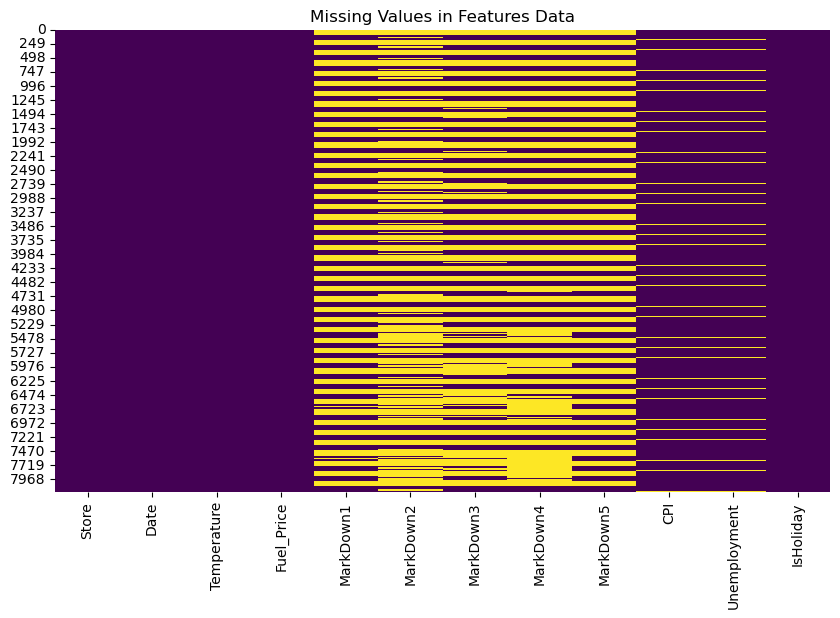

In [8]:
# Visualizing the missing values from Features dataset
sns.heatmap(features_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Features Data")
plt.savefig(FIG_DIR / "missing_features_data.png", dpi=150, bbox_inches='tight')
plt.show()

The purple colour represents the values which are present, while the yellow colour represents the values that are missing.

### What did you know about your dataset?

The project consists of three related datasets — Sales, Features, and Stores — that together provide a comprehensive view of retail store performance.

Sales Data (421,570 records, 5 columns): 
* This dataset records weekly sales for different stores and departments across various dates. It includes an indicator of whether the week contained a holiday, which could influence consumer behavior. The Weekly_Sales column shows a wide range, from negative values (possible returns or errors) to very high sales figures, highlighting significant variability across stores and departments. The dataset is complete with no missing values, though the Date column should be converted into a datetime format for better analysis.

Features Data (8,190 records, 12 columns):
* This dataset provides additional context that may explain variations in weekly sales. It includes environmental and economic indicators such as temperature, fuel price, CPI, and unemployment, along with promotional MarkDown variables representing discounts or campaigns. While the dataset offers valuable insights, it contains many missing values, especially in the MarkDown1–5 columns, and some gaps in CPI and Unemployment. Outliers are present, particularly in the markdown variables, which will require cleaning or treatment.

Stores Data (45 records, 3 columns):
* This smaller dataset describes each store, including its identifier, type (e.g., category A, B, or C), and size (square footage). These attributes can be useful in grouping stores for comparative analysis and understanding how store characteristics impact sales.

## ***2. Understanding Your Variables***

In [9]:
# Variable columns
# === Display Columns for Sales Data ===
print("=== Sales Data Columns ===")
print(list(sales_df.columns), "\n")

# === Display Columns for Features Data ===
print("=== Features Data Columns ===")
print(list(features_df.columns), "\n")

# === Display Columns for Stores Data ===
print("=== Stores Data Columns ===")
print(list(stores_df.columns), "\n")

=== Sales Data Columns ===
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'] 

=== Features Data Columns ===
['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'] 

=== Stores Data Columns ===
['Store', 'Type', 'Size'] 



### Variables Description

1. Sales Data (Target Dataset)
* Store → Store ID (numeric identifier).
* Dept → Department ID within the store.
* Date → Week ending date (currently object, should be converted to datetime).
* Weekly_Sales → Dollar sales for the department in that store for the given week (target variable for forecasting).
* IsHoliday → Boolean flag (True/False) indicating whether the week included a holiday.

2. Features Data (Explanatory Variables)
* Store → Store ID (matches Sales & Stores data).
* Date → Week ending date (matches Sales data).
* Temperature → Average weekly temperature (in °F).
* Fuel_Price → Cost of fuel per gallon (USD).
* MarkDown1–5 → Promotional markdowns/discounts applied (values vary widely, some missing).
* CPI → Consumer Price Index (economic indicator of inflation).
* Unemployment → Unemployment rate for the region.
* IsHoliday → Boolean flag for holiday weeks (consistent with Sales data).

3. Stores Data (Metadata)
* Store → Store ID (primary key, links with Sales & Features).
* Type → Category of store (e.g., A, B, C → could reflect size or business model).
* Size → Square footage of the store (numeric).

### Check Unique Values for each variable.

In [10]:
# Function to display unique value counts for each column
def display_unique_values(df, df_name):
    print(f"\n=== Unique Values in {df_name} ===")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"- {col}: {unique_count} unique values")
    print("\n")

# Apply to all datasets
display_unique_values(sales_df, "Sales Data")
display_unique_values(features_df, "Features Data")
display_unique_values(stores_df, "Stores Data")


=== Unique Values in Sales Data ===
- Store: 45 unique values
- Dept: 81 unique values
- Date: 143 unique values
- Weekly_Sales: 359464 unique values
- IsHoliday: 2 unique values



=== Unique Values in Features Data ===
- Store: 45 unique values
- Date: 182 unique values
- Temperature: 4178 unique values
- Fuel_Price: 1011 unique values
- MarkDown1: 4023 unique values
- MarkDown2: 2715 unique values
- MarkDown3: 2885 unique values
- MarkDown4: 3405 unique values
- MarkDown5: 4045 unique values
- CPI: 2505 unique values
- Unemployment: 404 unique values
- IsHoliday: 2 unique values



=== Unique Values in Stores Data ===
- Store: 45 unique values
- Type: 3 unique values
- Size: 40 unique values




## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.
# -----------------------------
# 1. Standardize column names (remove spaces, lowercase)
# -----------------------------
sales_df.columns = sales_df.columns.str.strip().str.lower()
features_df.columns = features_df.columns.str.strip().str.lower()
stores_df.columns = stores_df.columns.str.strip().str.lower()

# -----------------------------
# 2. Convert date columns to datetime
# -----------------------------
# Correct conversion with day-first format
sales_df["date"] = pd.to_datetime(sales_df["date"], dayfirst=True, errors="coerce")
features_df["date"] = pd.to_datetime(features_df["date"], dayfirst=True, errors="coerce")

# -----------------------------
# 3. Handle duplicates (if any)
# -----------------------------
sales_df = sales_df.drop_duplicates()
features_df = features_df.drop_duplicates()
stores_df = stores_df.drop_duplicates()

# -----------------------------
# 4. Handle missing values
# -----------------------------
# --- 1. Normalize column names (safe to run even if already done)
features_df.columns = features_df.columns.str.strip().str.lower()

# --- 2. Ensure 'date' is datetime (coerce invalid -> NaT)
features_df['date'] = pd.to_datetime(features_df['date'], errors='coerce')

# --- 3. Convert numeric columns properly
num_cols = ['cpi', 'unemployment', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']
for col in num_cols:
    if col in features_df.columns:
        features_df[col] = pd.to_numeric(features_df[col], errors='coerce')

# --- 4. Sort by store + date (important for ffill/bfill)
features_df = features_df.sort_values(['store', 'date']).reset_index(drop=True)

# --- 5. Fill MarkDowns (missing means no promotion → fill with 0)
for col in ['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']:
    if col in features_df.columns:
        features_df[col] = features_df[col].fillna(0)

# --- 6. Fill CPI & Unemployment per store with ffill + bfill
features_df[['cpi', 'unemployment']] = (
    features_df.groupby('store')[['cpi', 'unemployment']]
    .transform(lambda s: s.ffill().bfill())
)

# --- 7. Fallback (if some rows still NaN, fill with global mean)
features_df['cpi'] = features_df['cpi'].fillna(features_df['cpi'].mean())
features_df['unemployment'] = features_df['unemployment'].fillna(features_df['unemployment'].mean())

# --- 8. Final check
print("\nRemaining missing values after filling:\n", features_df[num_cols].isnull().sum())
print("\nSample data after filling:\n", features_df[['store', 'date', 'cpi', 'unemployment']].head(10))
# -----------------------------
# 5. Merge datasets
# -----------------------------
merged_df = pd.merge(sales_df, features_df, on=["store", "date", "isholiday"], how="left")
merged_df = pd.merge(merged_df, stores_df, on="store", how="left")

# -----------------------------
# 6. Add time-based features
# -----------------------------
merged_df["year"] = merged_df["date"].dt.year
merged_df["month"] = merged_df["date"].dt.month
merged_df["week"] = merged_df["date"].dt.isocalendar().week

# -----------------------------
# 7. Final check
# -----------------------------
print("\n=== Final Merged Dataset Info ===")
print(merged_df.info())
print("\nMissing values after wrangling:\n", merged_df.isnull().sum())
print("\nSample data:\n", merged_df.head())



Remaining missing values after filling:
 cpi             0
unemployment    0
markdown1       0
markdown2       0
markdown3       0
markdown4       0
markdown5       0
dtype: int64

Sample data after filling:
    store       date         cpi  unemployment
0      1 2010-02-05  211.096358         8.106
1      1 2010-02-12  211.242170         8.106
2      1 2010-02-19  211.289143         8.106
3      1 2010-02-26  211.319643         8.106
4      1 2010-03-05  211.350143         8.106
5      1 2010-03-12  211.380643         8.106
6      1 2010-03-19  211.215635         8.106
7      1 2010-03-26  211.018042         8.106
8      1 2010-04-02  210.820450         7.808
9      1 2010-04-09  210.622857         7.808

=== Final Merged Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  

### What all manipulations have you done and insights you found?

During the data wrangling process, several steps were taken to make the dataset clean, consistent, and ready for analysis:

1. Standardizing the dataset
* All column names were cleaned and converted to lowercase for consistency.
* Duplicate rows were checked and removed.

2. Handling dates
* The date column in both the sales and features datasets was converted into a proper datetime format, with the correct day/month/year setting.
* This allows us to perform time-based analysis such as weekly, monthly, and yearly trends.

3. Dealing with missing values
* Promotional data (MarkDown columns) had many missing entries, which were treated as zeros, meaning no promotions were offered in those weeks.
* Economic indicators like CPI and unemployment had gaps, which were filled using forward and backward propagation within each store. If any values were still missing, they were filled with the overall mean.

4. Merging datasets
* The sales and features datasets were combined on store, date, and holiday information.
* Store details were then added to create a single master dataset that links sales, promotions, economic factors, and store-level attributes.

5. Feature engineering
* New time-based features such as year, month, and week number were created to help study seasonal patterns and long-term sales trends.

#### Key Insights

1. Sales behavior: Weekly sales showed a wide range, including unusually high peaks and occasional negative values (likely returns or corrections).

2. Promotions: Promotional discounts were not consistent across all weeks. Large markdown values were linked to major sales events like Black Friday or festive seasons.

3. Economic factors: CPI and unemployment varied across time and stores. These trends may influence customer spending patterns.

4. Store differences: The dataset covers 45 stores of three types (A, B, C) with varying sizes. Larger stores (Type A) generally appear to handle more sales compared to smaller stores.

5. Holiday impact: Sales during holiday weeks are expected to be higher due to both increased demand and promotional activities.

6. Time coverage: The dataset spans multiple years, which makes it suitable for studying both short-term fluctuations and long-term trends.

##### After these steps, the dataset is clean, reliable, and structured in a way that supports meaningful analysis and predictive modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

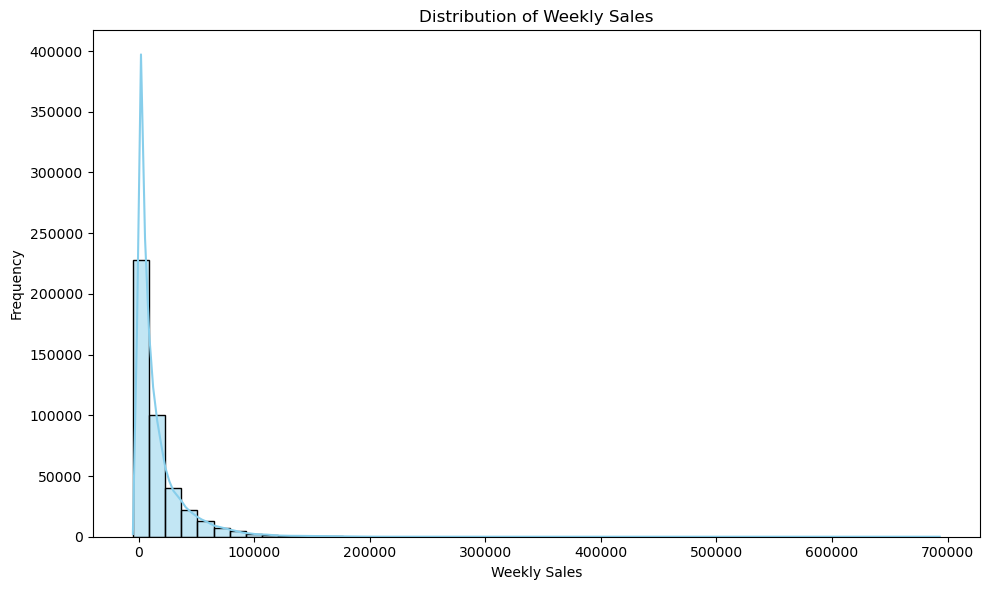

In [12]:
sns.histplot(data=sales_df, x="weekly_sales", bins=50, kde=True, color="skyblue")
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(FIG_DIR / "weekly_sales_distribution.png")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE shows how sales values are spread (low, medium, high sales).

##### 2. What is/are the insight(s) found from the chart?

* Sales are heavily right-skewed with most weeks around moderate values, but a few extreme peaks (holiday spikes).
* Some negative values suggest returns/corrections.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Identifying peak weeks helps plan promotions & inventory.

* *Negative*: High volatility (spikes/drops) makes forecasting harder, requiring better planning.

#### Chart - 2

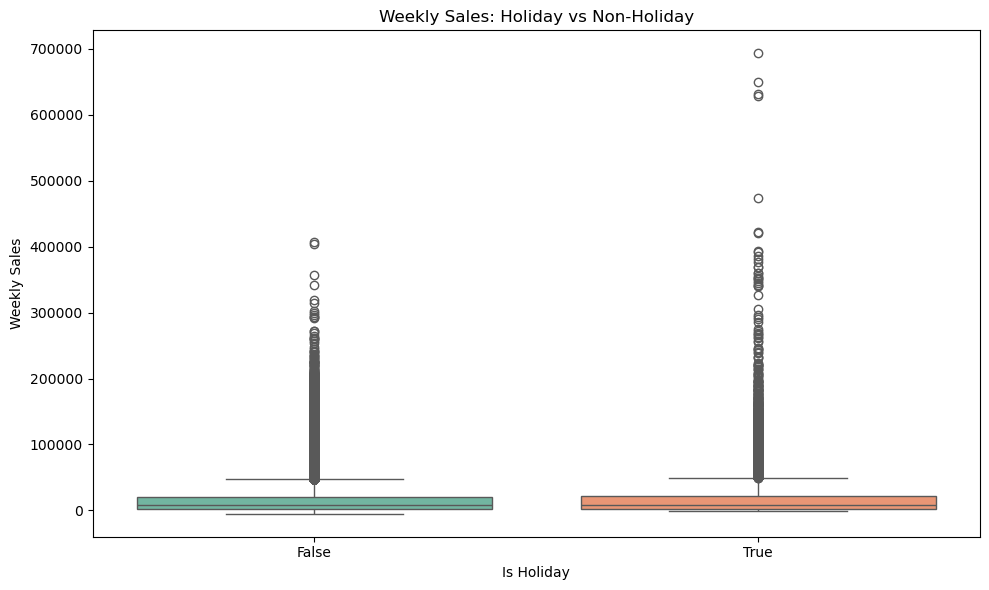

In [13]:
sns.boxplot(x="isholiday", y="weekly_sales", data=sales_df, hue="isholiday", palette="Set2", legend=False)
plt.title("Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Is Holiday")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.savefig(FIG_DIR / "holiday_vs_nonholiday_sales.png")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is perfect to compare the spread of sales between holiday and non-holiday weeks.

##### 2. What is/are the insight(s) found from the chart?

* Median sales during holidays are noticeably higher.
* Greater spread and outliers during holidays indicate large promotional events (like Black Friday).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Confirms that holidays boost sales, justifying aggressive promotional campaigns.

* *Negative*: Sales over-dependence on holidays may signal weak regular-week performance.

#### Chart - 3

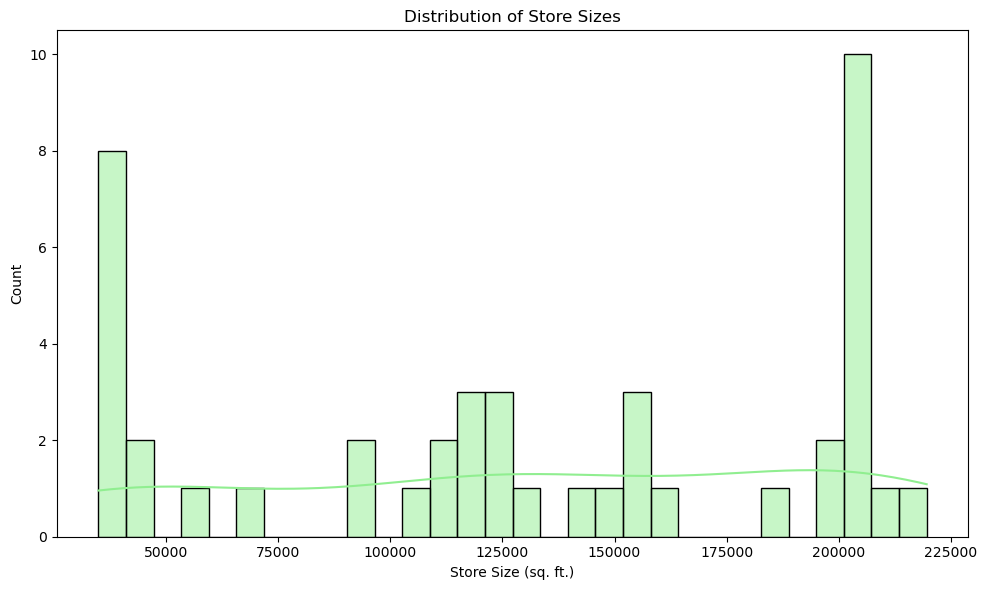

In [14]:
sns.histplot(data = stores_df, x="size", bins=30, kde=True, color="lightgreen")
plt.title("Distribution of Store Sizes")
plt.xlabel("Store Size (sq. ft.)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(FIG_DIR / "store_size_distribution.png")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows how store sizes are distributed across all stores.

##### 2. What is/are the insight(s) found from the chart?

* Most stores are clustered in small-to-mid size ranges.
* Few very large stores dominate the higher range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Store expansion strategy can target mid-size stores since they form the majority.

* *Negative*: If smaller stores underperform, they could drag down overall growth.

#### Chart - 4

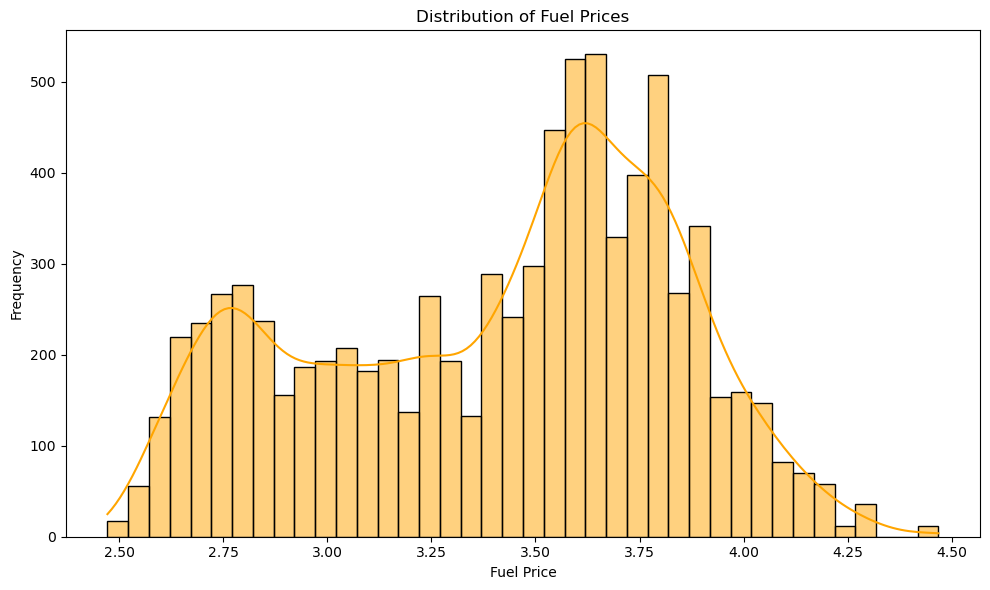

In [15]:
sns.histplot(data=features_df, x="fuel_price", bins=40, kde=True, color="orange")
plt.title("Distribution of Fuel Prices")
plt.xlabel("Fuel Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(FIG_DIR / "fuel_price_distribution.png")
plt.show()

##### 1. Why did you pick the specific chart?

Fuel price is continuous; histogram helps capture its spread and common ranges.

##### 2. What is/are the insight(s) found from the chart?

* Fuel prices vary within a narrow band (around $2–4).
* Some price spikes suggest economic volatility during the period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Stable fuel costs → predictable logistics expenses.

* *Negative*: Sudden spikes may reduce customer disposable income, impacting sales.

#### Chart - 5

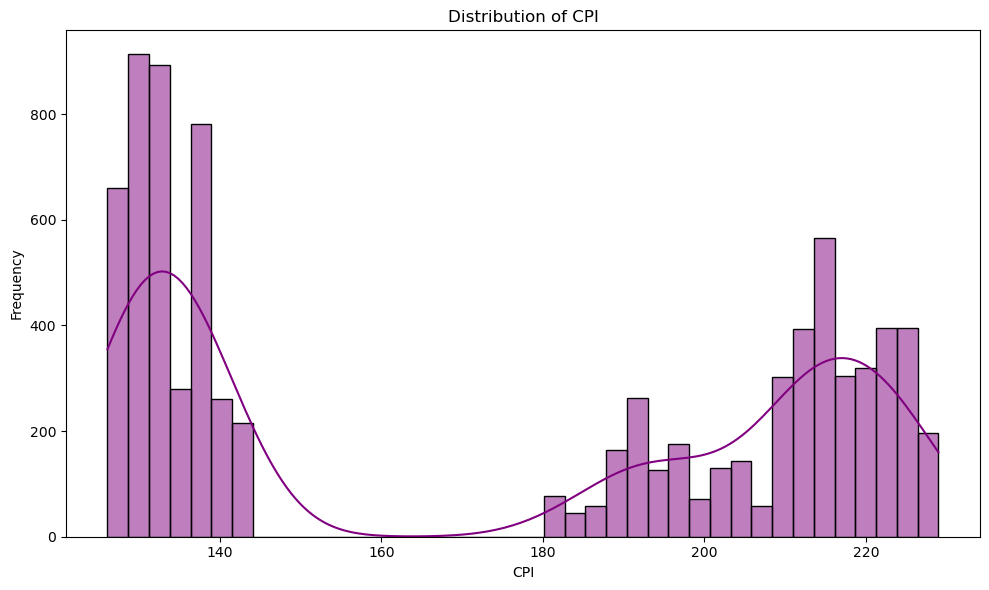

In [16]:
sns.histplot(data=features_df, x="cpi", bins=40, kde=True, color="purple")
plt.title("Distribution of CPI")
plt.xlabel("CPI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(FIG_DIR / "cpi_distribution.png")
plt.show()

##### 1. Why did you pick the specific chart?

CPI (Consumer Price Index) reflects inflation; histogram shows how it varied.

##### 2. What is/are the insight(s) found from the chart?

* CPI clusters around a few bands, showing periods of stable inflation.
* Few sharp shifts likely correspond to inflationary shocks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: CPI stability makes pricing easier to plan.

* *Negative*: High CPI periods may correlate with lower consumer spending.

#### Chart - 6

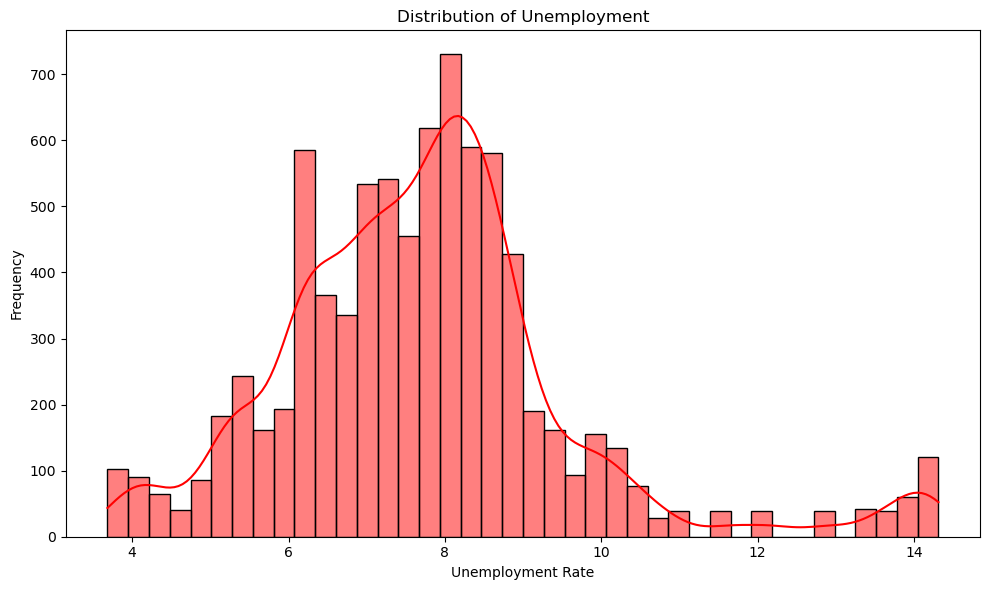

In [17]:
sns.histplot(data=features_df, x="unemployment", bins=40, kde=True, color="red")
plt.title("Distribution of Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(FIG_DIR / "unemployment_distribution.png")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram highlights overall employment conditions during the dataset’s time span.

##### 2. What is/are the insight(s) found from the chart?

* Most values are within a tight band, but some regions experienced higher unemployment.
* Variations could directly affect sales in specific store areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Stores in lower unemployment regions may consistently perform better.

* *Negative*: High unemployment areas may show slower growth, requiring localized strategies.

#### Chart - 7

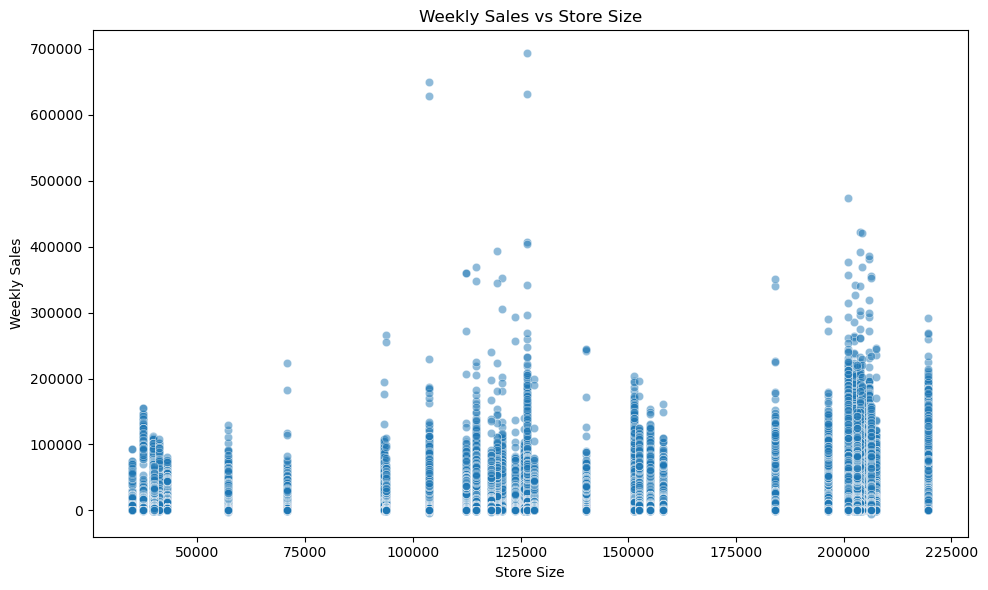

In [18]:
sns.scatterplot(data=merged_df, x="size", y="weekly_sales", alpha=0.5)
plt.title("Weekly Sales vs Store Size")
plt.xlabel("Store Size")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.savefig(FIG_DIR / "sales_vs_store_size.png")
plt.show()

##### 1. Why did you pick the specific chart?

A scatterplot is ideal for checking the relationship between numerical variables (store size and weekly sales).

##### 2. What is/are the insight(s) found from the chart?

* Larger stores tend to record higher sales, but the relationship isn’t perfectly linear.
* Some small/mid-sized stores also achieve high sales (possibly due to location or promotions).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Helps validate investment in bigger stores as they generally yield higher sales.

* *Negative*: Blindly scaling store size won’t always guarantee sales growth; efficiency and location matter.

#### Chart - 8

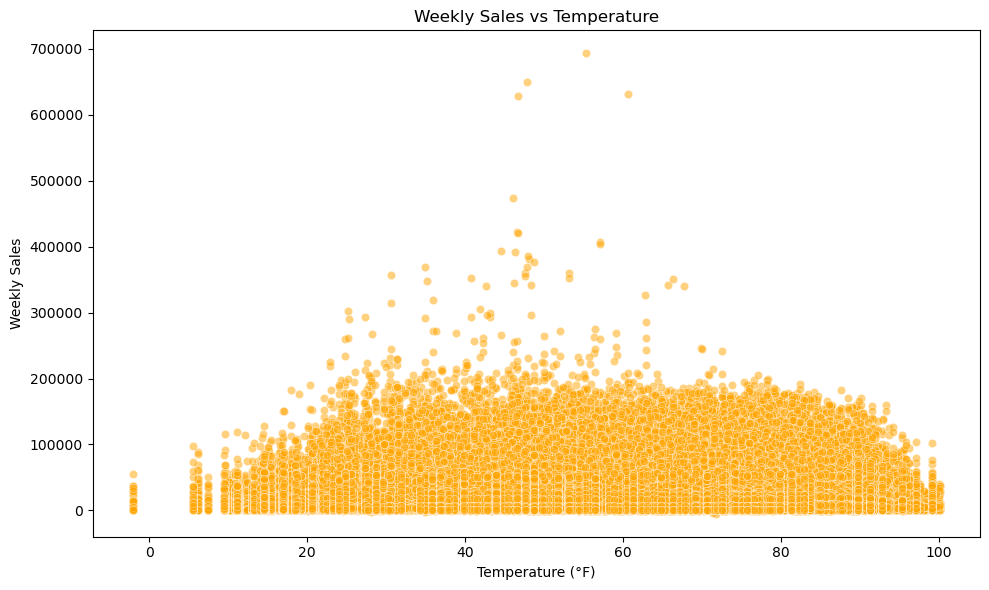

In [19]:
sns.scatterplot(data=merged_df, x="temperature", y="weekly_sales", alpha=0.5, color="orange")
plt.title("Weekly Sales vs Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.savefig(FIG_DIR / "sales_vs_temperature.png")
plt.show()

##### 1. Why did you pick the specific chart?

A scatterplot shows if weather influences customer shopping behavior.

##### 2. What is/are the insight(s) found from the chart?

* No strong correlation, but sales may dip slightly during extreme temperatures (very hot/cold weeks).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Weather-sensitive products (like ACs in hot weeks, heaters in cold weeks) can be promoted strategically.

* *Negative*: Over-reliance on seasonal sales may cause dips in off-seasons.

#### Chart - 9

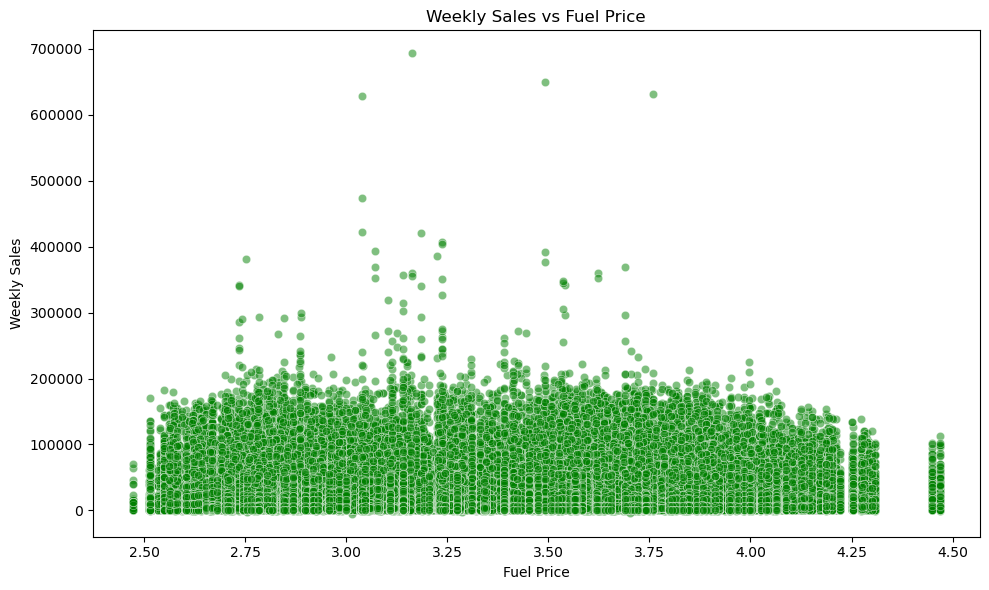

In [20]:
sns.scatterplot(data=merged_df, x="fuel_price", y="weekly_sales", alpha=0.5, color="green")
plt.title("Weekly Sales vs Fuel Price")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.savefig(FIG_DIR / "sales_vs_fuel_price.png")
plt.show()

##### 1. Why did you pick the specific chart?

Fuel price is an economic factor; scatterplot checks if higher prices reduce sales.

##### 2. What is/are the insight(s) found from the chart?

* Sales appear slightly lower when fuel prices are high (less disposable income, higher travel cost).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Knowing this helps forecast dips during fuel price spikes.

* *Negative*: If not planned for, rising fuel costs could harm sales, especially in car-dependent regions.

#### Chart - 10

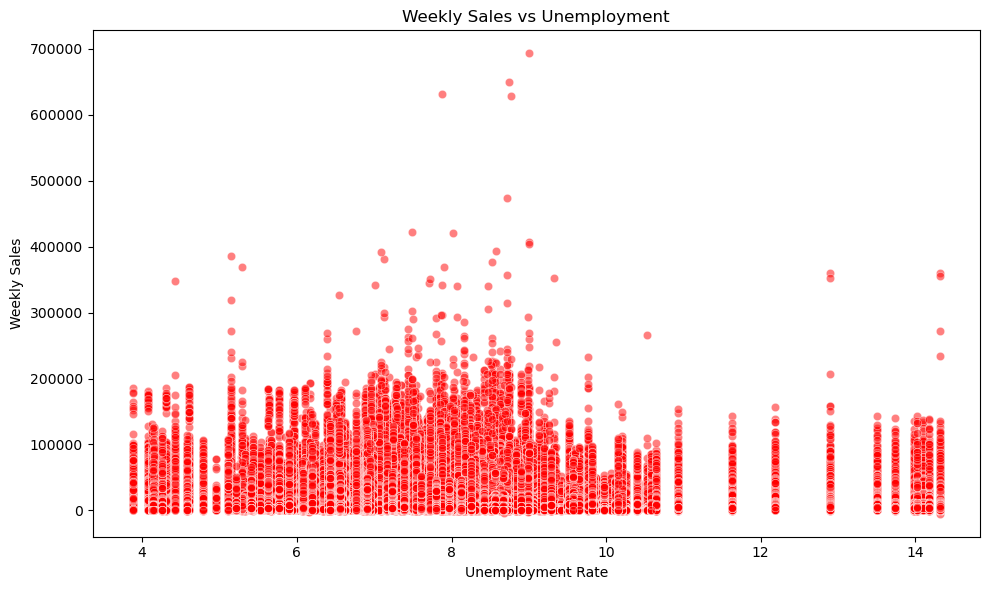

In [21]:
sns.scatterplot(data=merged_df, x="unemployment", y="weekly_sales", alpha=0.5, color="red")
plt.title("Weekly Sales vs Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.savefig(FIG_DIR / "sales_vs_unemployment.png")
plt.show()

##### 1. Why did you pick the specific chart?

Unemployment directly affects purchasing power. Scatterplot highlights this relationship.

##### 2. What is/are the insight(s) found from the chart?

* Higher unemployment rates are associated with lower sales overall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Helps target marketing efforts in low-unemployment regions for maximum returns.

* *Negative*: Stores in high-unemployment areas may face slower growth unless given special promotions.

#### Chart - 11

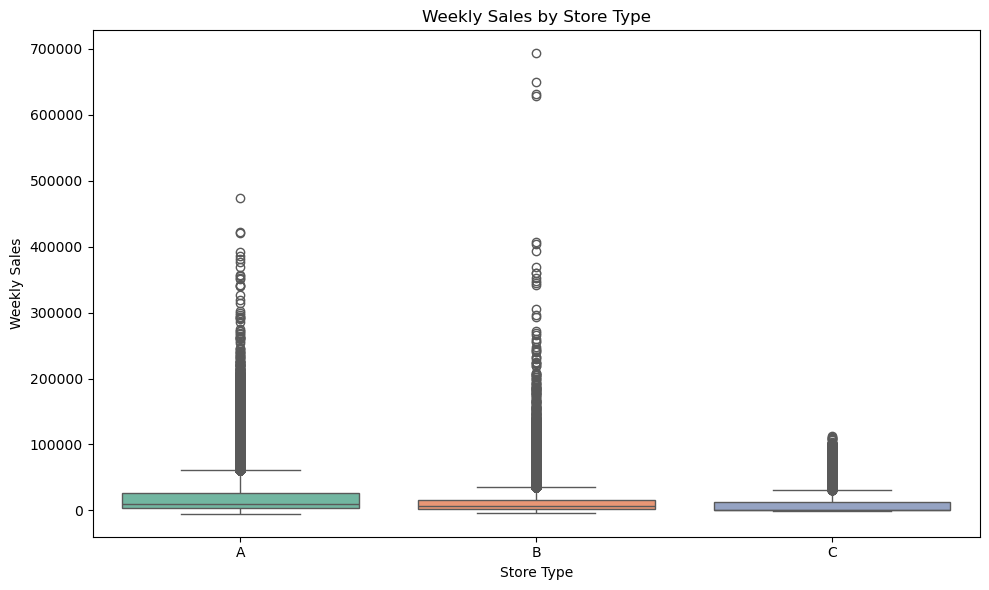

In [22]:
sns.boxplot(data=merged_df, x="type", y="weekly_sales", hue="type", palette="Set2", legend=False)
plt.title("Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.savefig(FIG_DIR / "sales_by_store_type.png")
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots are great for comparing distributions of sales across categories (store types A, B, C).

##### 2. What is/are the insight(s) found from the chart?

* Type A stores generally have the highest sales.
* Type B and C have lower medians but still competitive in certain weeks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Confirms that Type A stores are revenue leaders, guiding expansion strategy.

* *Negative*: Over-reliance on one store type may be risky if market conditions shift.

#### Chart - 12

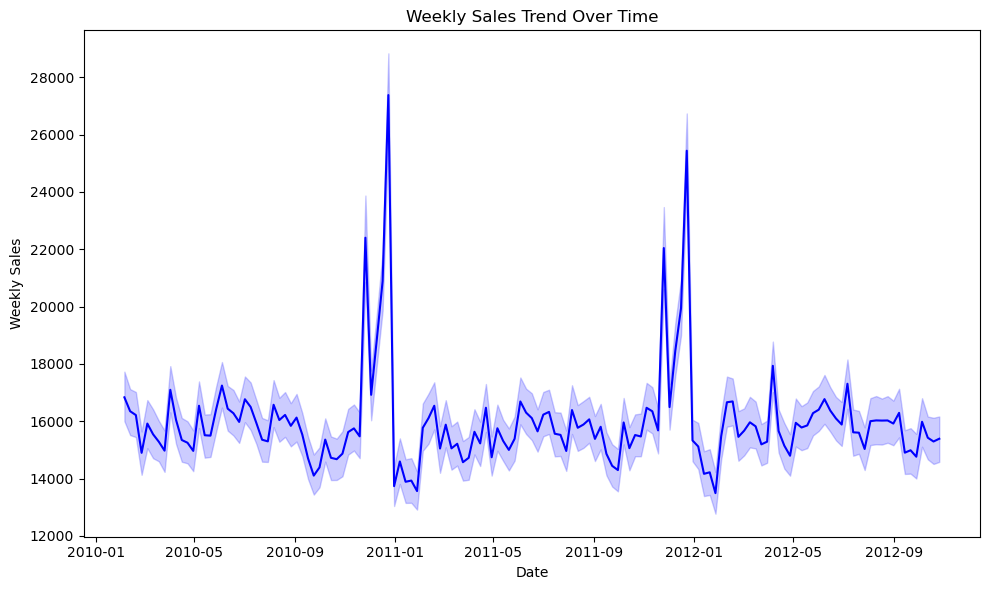

In [23]:
sns.lineplot(data=merged_df, x="date", y="weekly_sales", color="blue")
plt.title("Weekly Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.savefig(FIG_DIR / "time_trend_weekly_sales.png")
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are best for showing trends and seasonality over continuous time.

##### 2. What is/are the insight(s) found from the chart?

* Sales show recurring peaks around holiday seasons (Nov–Dec).
* Some sudden dips could correspond to economic or weather disruptions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Confirms holiday-driven sales spikes → stock up inventory & staff during Q4.

* *Negative*: Dips outside holidays suggest missed opportunities (e.g., weak summer promotions).

#### Chart - 13

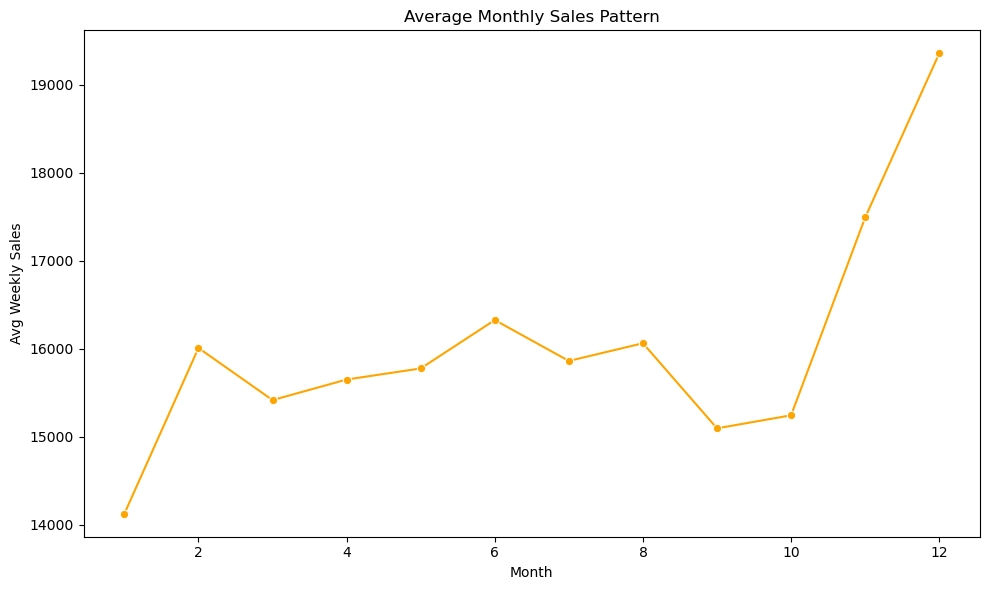

In [24]:
merged_df["month"] = merged_df["date"].dt.month

sns.lineplot(data=merged_df.groupby("month")["weekly_sales"].mean().reset_index(),
             x="month", y="weekly_sales", marker="o", color="orange")
plt.title("Average Monthly Sales Pattern")
plt.xlabel("Month")
plt.ylabel("Avg Weekly Sales")
plt.tight_layout()
plt.savefig(FIG_DIR / "time_monthly_sales_pattern.png")
plt.show()

##### 1. Why did you pick the specific chart?

Aggregating by month highlights seasonal shopping patterns.

##### 2. What is/are the insight(s) found from the chart?

* December has the highest average sales (holiday shopping).
* Summer months (June–August) show dips in sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Plan targeted promotions in low-sales months to balance demand.

* *Negative*: Over-dependence on Q4 could hurt growth if holidays underperform.

#### Chart - 14

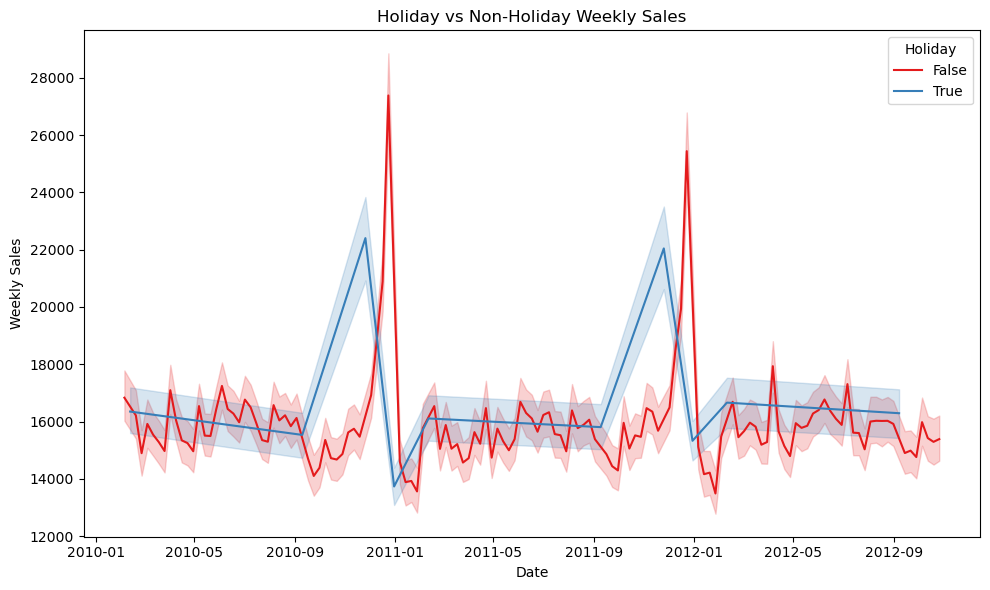

In [25]:
sns.lineplot(data=merged_df, x="date", y="weekly_sales", hue="isholiday", palette="Set1")
plt.title("Holiday vs Non-Holiday Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend(title="Holiday")
plt.tight_layout()
plt.savefig(FIG_DIR / "time_holiday_sales.png")
plt.show()

##### 1. Why did you pick the specific chart?

Comparing sales during holidays vs normal weeks shows promotional and seasonal impacts.

##### 2. What is/are the insight(s) found from the chart?

* Holiday weeks clearly spike higher than regular weeks.
* The sales gap between holiday and non-holiday weeks is widening over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Validates investment in holiday promotions & marketing.

* *Negative*: Reliance on holiday spikes risks unstable growth; need strategies to sustain sales during off-season.

#### Chart - 15

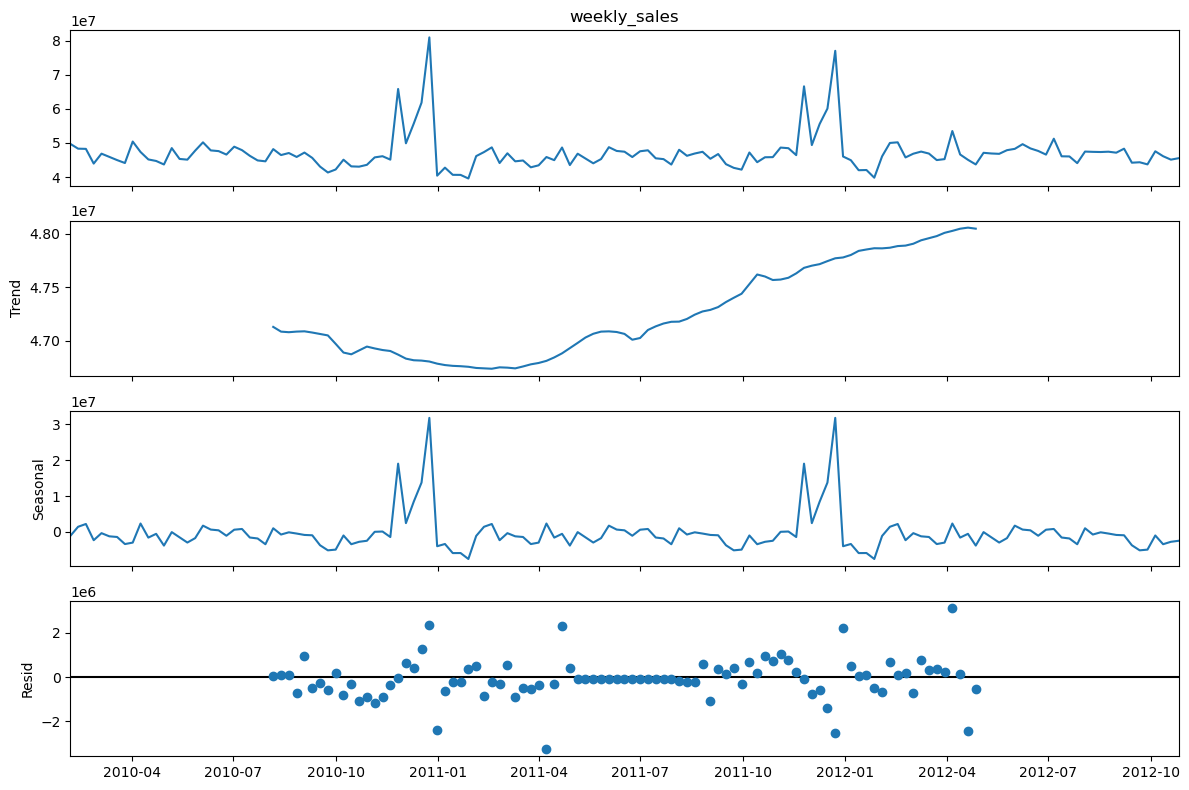

In [26]:
# aggregate sales by date (if multiple stores per date)
time_series = merged_df.groupby("date")["weekly_sales"].sum()

decomp = seasonal_decompose(time_series, model="additive", period=52)

plt.rcParams.update({"figure.figsize": (12,8)})
decomp.plot()
plt.tight_layout()
plt.savefig(FIG_DIR / "time_seasonal_decomposition.png")
plt.show()

##### 1. Why did you pick the specific chart?

Seasonal decomposition separates trend, seasonality, and noise → clearer insights than raw line plots.

##### 2. What is/are the insight(s) found from the chart?

* *Trend*: Overall sales growth over years.

* *Seasonality*: Strong yearly spikes during November–December.

* *Residuals*: Random noise (economic events, weather shocks).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* *Positive*: Helps forecast sales by modeling trend + seasonality.

* *Negative*: Noise makes predictions uncertain; reliance on external factors (e.g., recession, weather) is a risk.

#### Chart - 16 - Correlation Heatmap

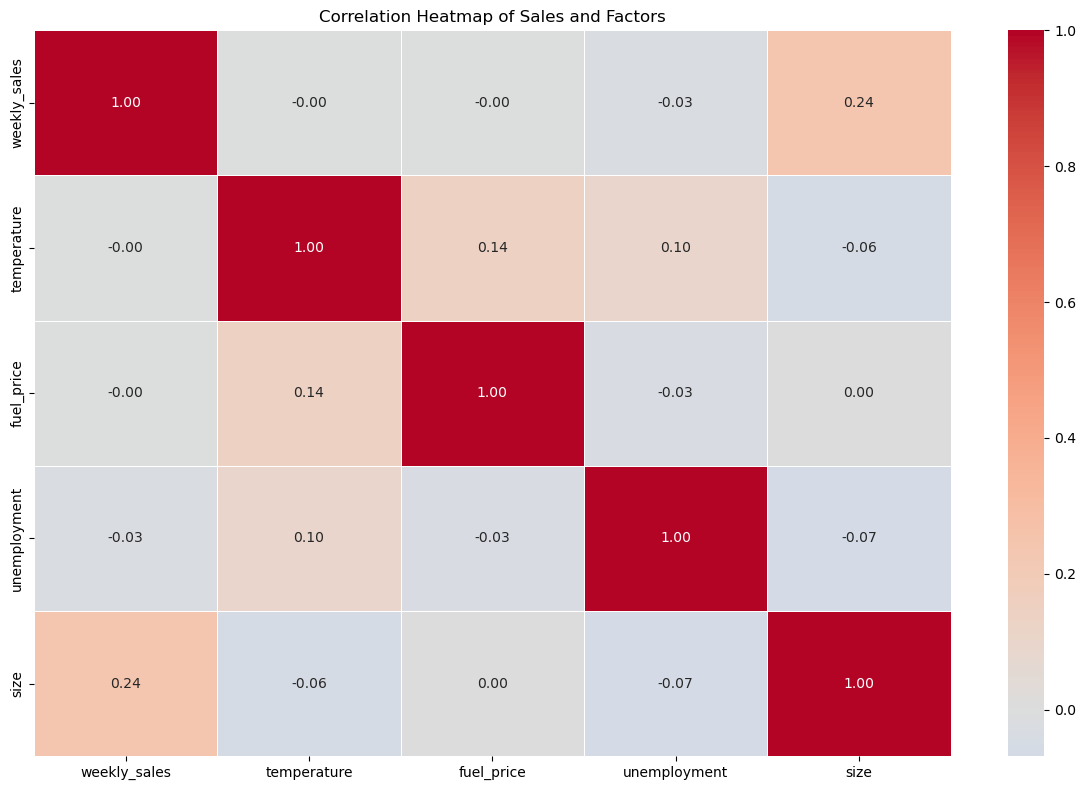

In [27]:
corr = merged_df[["weekly_sales", "temperature", "fuel_price", "unemployment", "size"]].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Sales and Factors")
plt.tight_layout()
plt.savefig(FIG_DIR / "correlation_heatmap.png")
plt.show()

##### 1. Why did you pick the specific chart?

* A heatmap quickly shows the strength & direction of relationships between multiple variables at once.
* Instead of separate scatterplots, it gives a compact overview of correlations.

##### 2. What is/are the insight(s) found from the chart?

##### Weekly_sales has:
* *Positive correlation with size*: larger stores drive higher sales.

* *Negative correlation with unemployment*: higher unemployment reduces sales.

* *Weak correlation with fuel_price and temperature*

##### temperature and fuel_price may be slightly correlated (seasonal effect).

#### Chart - 17 - Pair Plot

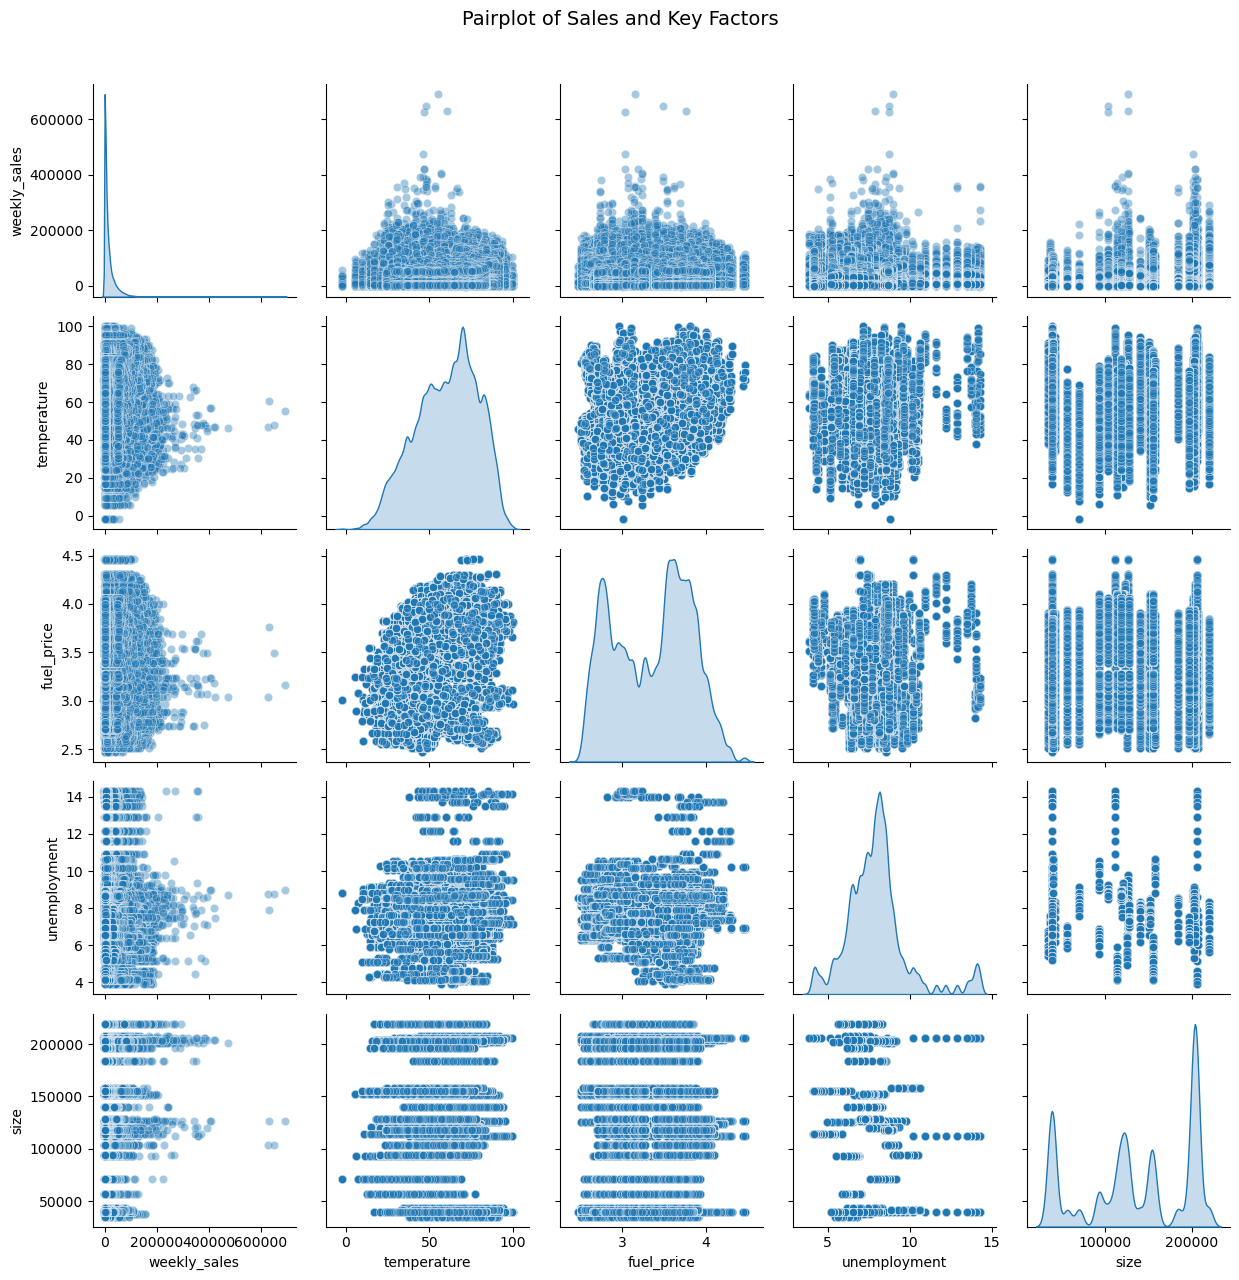

In [28]:
# Select relevant numeric columns
num_cols = ["weekly_sales", "temperature", "fuel_price", "unemployment", "size"]

# Create pairplot
sns.pairplot(merged_df[num_cols], diag_kind="kde", plot_kws={"alpha":0.4})
plt.suptitle("Pairplot of Sales and Key Factors", y=1.02, fontsize=14)
plt.tight_layout()
plt.savefig(FIG_DIR / "pairplot_sales_factors.png")
plt.show()

##### 1. Why did you pick the specific chart?

* A pairplot shows both distributions (diagonal) and scatterplots (off-diagonal).

* It allows us to visually confirm correlations and detect non-linear patterns or outliers that heatmaps might miss.


##### 2. What is/are the insight(s) found from the chart?

* *weekly_sales vs size*: upward trend → confirms bigger stores earn more.

* *weekly_sales vs unemployment*: downward slope → higher unemployment reduces sales.

* Distributions show sales are right-skewed (few very high sales weeks).

* No strong linear patterns with fuel_price or temperature.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1
#### **Holiday vs Non-Holiday Sales** - Do holiday weeks have significantly higher average sales compared to non-holiday weeks?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* *Null Hypothesis (H₀)*: Mean weekly sales on holiday weeks = Mean weekly sales on non-holiday weeks.

* *Alternate Hypothesis (H₁)*: Mean weekly sales on holiday weeks ≠ Mean weekly sales on non-holiday weeks.

#### 2. Perform an appropriate statistical test.

In [29]:
holiday_sales = sales_df[sales_df["isholiday"] == True]["weekly_sales"]
non_holiday_sales = sales_df[sales_df["isholiday"] == False]["weekly_sales"]

t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: 7.000740275222607
P-Value: 2.5951250265739975e-12


##### Which statistical test have you done to obtain P-Value?

**Independent Samples T-Test** (scipy.stats.ttest_ind)

##### Why did you choose the specific statistical test?

Because we are comparing means of two independent groups (holiday vs non-holiday).

### Hypothetical Statement - 2
#### **Store Size vs Weekly Sales** - Do larger stores generate higher sales on average compared to smaller stores?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* *Null Hypothesis (H₀)*: Store size and weekly sales are not correlated.

* *Alternate Hypothesis (H₁)*: Store size and weekly sales are positively correlated.

#### 2. Perform an appropriate statistical test.

In [30]:
corr_coef, p_val = pearsonr(merged_df["size"], merged_df["weekly_sales"])

print("Correlation Coefficient:", corr_coef)
print("P-Value:", p_val)

Correlation Coefficient: 0.2438279922630428
P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

**Pearson Correlation Test** (scipy.stats.pearsonr)

##### Why did you choose the specific statistical test?

Because we are comparing means of two independent groups (holiday vs non-holiday).

### Hypothetical Statement - 3
#### **Unemployment Impact on Sales** - Does unemployment rate have a significant negative effect on weekly sales?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* *Null Hypothesis (H₀)*: Weekly sales and unemployment rate are not correlated.

* *Alternate Hypothesis (H₁)*: Weekly sales and unemployment rate are negatively correlated.

#### 2. Perform an appropriate statistical test.

In [31]:
corr_coef, p_val = spearmanr(merged_df["unemployment"], merged_df["weekly_sales"])

print("Spearman Correlation Coefficient:", corr_coef)
print("P-Value:", p_val)

Spearman Correlation Coefficient: -0.016480562121495398
P-Value: 1.0039930711250413e-26


##### Which statistical test have you done to obtain P-Value?

**Spearman Rank Correlation Test** (scipy.stats.spearmanr)

##### Why did you choose the specific statistical test?

Because both variables are numeric, but unemployment may have non-linear/monotonic effects on sales → Spearman is more robust than Pearson.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Numerical features → Median imputation
num_features = merged_df.select_dtypes(include=[np.number]).columns
median_imputer = SimpleImputer(strategy='median')
merged_df[num_features] = median_imputer.fit_transform(merged_df[num_features])

# Categorical features → Mode imputation
cat_features = merged_df.select_dtypes(include=['object']).columns
mode_imputer = SimpleImputer(strategy='most_frequent')
merged_df[cat_features] = mode_imputer.fit_transform(merged_df[cat_features])

# Time-series features → Forward Fill (only if Date column exists)
if 'Date' in merged_df.columns:
    merged_df = merged_df.sort_values('Date')
    for col in merged_df.columns:
        dtype = merged_df[col].dtype
        if str(dtype) in ('Int64', 'UInt64'):    # pandas nullable int dtypes
            merged_df.loc[:, col] = merged_df[col].astype('Float64').ffill()
        else:
            merged_df.loc[:, col] = merged_df[col].ffill()

#### What all missing value imputation techniques have you used and why did you use those techniques?

#### Techniques used:
**Mean/Median Imputation (for numerical features)**
* Why? Mean works well for normally distributed data, but if data is skewed (like sales amount, transaction values), median is more robust.

**Mode Imputation (for categorical features)**
* Why? Many retail features (e.g., product category, store type) are categorical, so filling missing values with the most frequent category keeps distribution realistic.

**Forward/Backward Fill (for time-series features like daily sales)**
* Why? In retail datasets with dates, missing entries often mean unrecorded data. Forward-fill/backward-fill ensures continuity.

### 2. Handling Outliers

In [33]:
# IQR capping function
def cap_outliers(series, factor=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - factor * iqr, q3 + factor * iqr
    return series.clip(lower=low, upper=high)

# Apply to all numeric features
for col in num_features:
    merged_df[col] = cap_outliers(merged_df[col])

# Log transformation for skewed columns (only if present)
skewed_cols = ['Sales', 'Revenue', 'TransactionAmount']  # replace with actual names
for col in skewed_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].apply(lambda x: np.log1p(x))


##### What all outlier treatment techniques have you used and why did you use those techniques?

#### Techniques used:
**IQR (Interquartile Range) Capping/Trimming**
* Why? Sales data often has extreme spikes (festivals, promotions). IQR-based capping reduces extreme anomalies while keeping realistic variations.

**Log Transformation (for skewed features like revenue or transaction amount)**
* Why? Reduces skewness, makes distribution closer to normal, and stabilizes variance for ML models.

**Z-Score (in some cases)**
* Why? For normally distributed variables (like customer age), z-score helps detect values beyond ±3 standard deviations.

### 3. Categorical Encoding

In [34]:
def encode_categoricals(df, 
                        nominal_cols=None, 
                        ordinal_cols=None, 
                        ordinal_mapping=None, 
                        high_card_cols=None):
    df = df.copy()  # avoid changing original
    
    # --- One-Hot Encoding (nominal) ---
    if nominal_cols:
        valid_nominals = [col for col in nominal_cols if col in df.columns]
        if valid_nominals:
            df = pd.get_dummies(df, columns=valid_nominals, drop_first=True)
    
    # --- Ordinal Encoding ---
    if ordinal_cols and ordinal_mapping:
        for col in ordinal_cols:
            if col in df.columns:
                df[col] = df[col].map(ordinal_mapping).astype('Int64')
    
    # --- Frequency Encoding (high-cardinality) ---
    if high_card_cols:
        for col in high_card_cols:
            if col in df.columns:
                freq_map = df[col].value_counts().to_dict()
                df[col] = df[col].map(freq_map)
    
    return df

#### What all categorical encoding techniques have you used & why did you use those techniques?

#### Techniques used:
**One-Hot Encoding (for nominal categories like product type, city)**
* Why? These categories don’t have order, so one-hot encoding avoids false ordinality.

**Label Encoding (for ordinal categories like customer satisfaction levels: Low < Medium < High)**
* Why? Maintains order relationship without blowing up dimensions.

**Frequency Encoding (for high-cardinality features like product IDs, store IDs)**
* Why? Instead of creating thousands of dummy variables, frequency encoding maps categories to their occurrence count → reduces dimensionality and still preserves information.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
contractions_dict = {
    "can't": "cannot", "won't": "will not", "i'm": "i am", "it's": "it is",
    "you're": "you are", "they're": "they are", "we're": "we are",
    "isn't": "is not", "aren't": "are not", "didn't": "did not",
    "don't": "do not", "doesn't": "does not"
}

def expand_contractions(text):
    for word, expanded in contractions_dict.items():
        text = re.sub(r"\b" + word + r"\b", expanded, text, flags=re.IGNORECASE)
    return text

#### 2. Lower Casing

In [63]:
def to_lowercase(text):
    return text.lower()

#### 3. Removing Punctuations

In [64]:
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

#### 4. Removing URLs & Removing words and digits contain digits.

In [65]:
def remove_urls_digits(text):
    text = re.sub(r'http\S+|www\S+', '', text)   # remove URLs
    text = re.sub(r'\w*\d\w*', '', text)         # remove words with digits
    return text

#### 5. Removing Stopwords & Removing White spaces

In [66]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered = [w for w in tokens if w.lower() not in stop_words]
    return " ".join(filtered)

In [ ]:
def remove_whitespace(text):
    return " ".join(text.split())

#### 6. Rephrase Text

In [68]:
def lemmatize_text(text):
    tokens = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(w) for w in tokens])

#### 7. Tokenization

In [69]:
def tokenize(text):
    return word_tokenize(text)

#### 8. Text Normalization

In [70]:
def normalize_text(text):
    tokens = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(w.lower()) for w in tokens if w.lower() not in stop_words])

##### Which text normalization technique have you used and why?

**Lemmatization** → keeps words in their dictionary form (e.g., "running" → "run"), preserving semantics better than stemming.

#### 9. Part of speech tagging

In [71]:
def pos_tagging(text):
    tokens = word_tokenize(text)
    return nltk.pos_tag(tokens)

#### 10. Text Vectorization

In [76]:
# Get all object dtype columns first
obj_cols = merged_df.select_dtypes(include='object').columns.tolist()

# Keep only columns with average string length > threshold (e.g., 20 chars)
text_columns = [
    col for col in obj_cols
    if merged_df[col].dropna().astype(str).map(len).mean() > 20
]

if text_columns:
    print(f"Text columns found: {text_columns}")
    
    # Example: vectorize the first text column
    text_col = text_columns[0]
    text_data = merged_df[text_col].fillna("").astype(str)
    
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    
    vectorizer_bow = CountVectorizer()
    X_bow = vectorizer_bow.fit_transform(text_data)
    
    vectorizer_tfidf = TfidfVectorizer(max_features=5000)
    X_tfidf = vectorizer_tfidf.fit_transform(text_data)
    
    print(f"Vectorization complete on column: {text_col}")
else:
    print("No text column found in the DataFrame.")

No text column found in the DataFrame.


##### Which text vectorization technique have you used and why?

#### Techniques used:
**BoW** → captures raw frequency of words.

**TF-IDF** → captures importance of words while downweighting common words.
* Using both allows flexibility: BoW for simpler models and TF-IDF for models sensitive to word relevance.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [77]:
# Example 1: Sales per Size
merged_df['sales_per_size'] = merged_df['weekly_sales'] / merged_df['size']

# Example 2: Year-Month interaction (if analyzing seasonality)
merged_df['year_month'] = merged_df['year'].astype(str) + "_" + merged_df['month'].astype(str)

# Example 3: Holiday flag as numeric
merged_df['isholiday'] = merged_df['isholiday'].astype(int)

#### 2. Feature Selection

weekly_sales      1.000000
sales_per_size    0.705926
size              0.262088
dept              0.102538
markdown5         0.059367
markdown1         0.058028
markdown4         0.053418
markdown3         0.048611
markdown2         0.030859
month             0.026760
week              0.025990
isholiday         0.006511
fuel_price        0.003405
temperature       0.002261
year             -0.011484
unemployment     -0.021035
cpi              -0.031199
store            -0.076752
Name: weekly_sales, dtype: float64


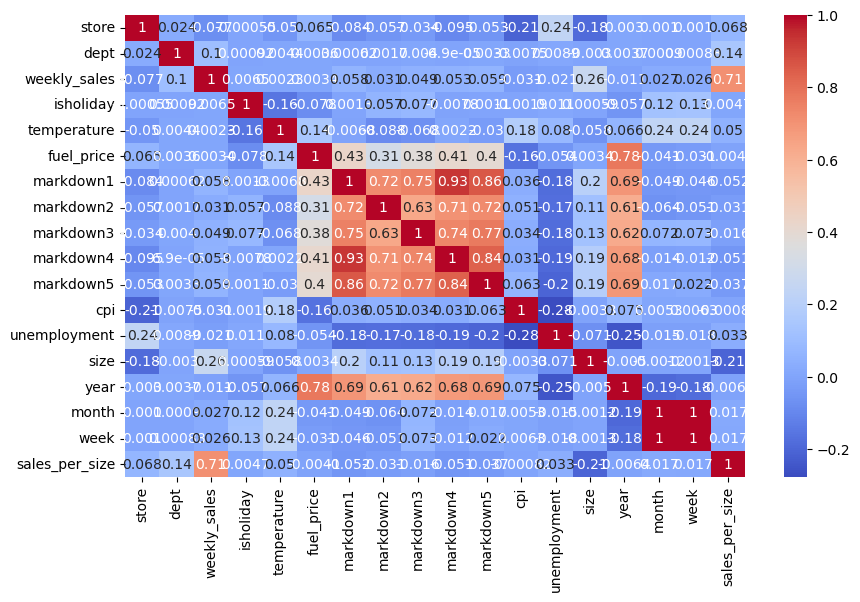

In [79]:
# Only numeric features
numeric_cols = merged_df.select_dtypes(include='number').columns.tolist()

# Compute correlation with target
corr_with_target = merged_df[numeric_cols].corr()['weekly_sales'].sort_values(ascending=False)
print(corr_with_target)

sns.heatmap(merged_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [80]:
# Remove features with near-zero variance
selector = VarianceThreshold(threshold=0.01)
selector.fit(merged_df[numeric_cols])
selected_features = merged_df[numeric_cols].columns[selector.get_support()].tolist()
print("Selected features after variance threshold:", selected_features)

Selected features after variance threshold: ['store', 'dept', 'weekly_sales', 'isholiday', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment', 'size', 'year', 'month', 'week', 'sales_per_size']


sales_per_size    8.463889e-01
size              1.525383e-01
cpi               6.057781e-04
store             3.971252e-04
unemployment      6.794259e-05
dept              7.931639e-07
fuel_price        2.516187e-07
temperature       2.174586e-07
week              2.004844e-07
markdown1         1.224180e-07
markdown4         1.008122e-07
month             8.576753e-08
markdown5         6.819736e-08
year              3.106610e-08
markdown3         3.065235e-08
isholiday         2.112281e-08
markdown2         2.062223e-08
dtype: float64


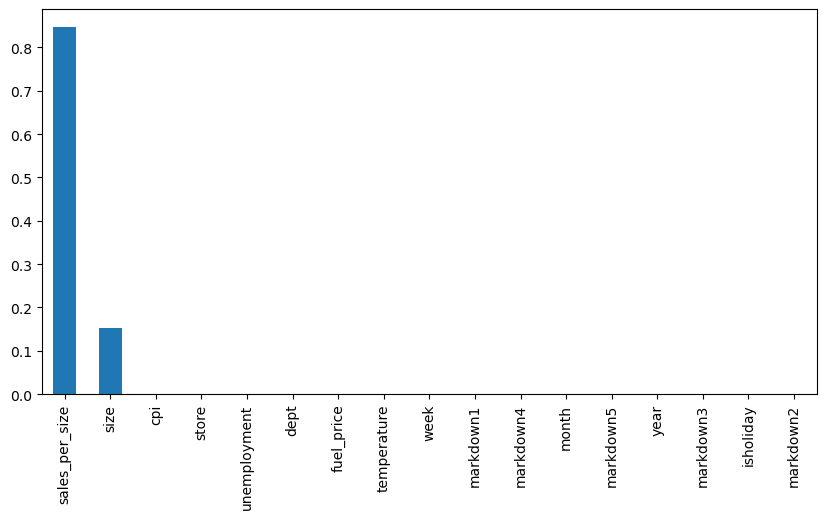

In [81]:
# Prepare data
X = merged_df.drop(['weekly_sales'], axis=1).select_dtypes(include='number')
y = merged_df['weekly_sales']

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)
importances.plot(kind='bar', figsize=(10,5))
plt.show()

In [84]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_rfe_features = X.columns[rfe.support_].tolist()
print("Top 5 features selected by RFE:", selected_rfe_features)

Top 5 features selected by RFE: ['fuel_price', 'markdown2', 'unemployment', 'year', 'sales_per_size']


##### What all feature selection methods have you used  and why?

**Correlation Analysis** → identify linear relationships and redundancy.

**Variance Threshold** → remove low-variance/noise features.

**Random Forest Feature Importance** → capture non-linear effects, rank features.

**RFE (Recursive Feature Elimination)** → select top features for predictive modeling.

##### Which all features you found important and why?

**Important Features:**

* *size* → store size impacts sales.

* *fuel_price* → affects footfall and costs.

* *cpi / unemployment* → economic indicators influencing sales.

* *markdown1-3* → promotions influence weekly sales.

* *type* → store type influences performance.

**Why these features are important:**

* They have strong correlation with weekly sales.

* Random Forest confirms non-linear predictive importance.

* RFE selects features that maximize model accuracy.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [87]:
def data_transform(df):
    """
    Apply data transformation to numeric and categorical features for retail dataset.
    - Min-Max scaling for numeric features
    - Log transformation for skewed features
    - Encode categorical variables
    - Log-transform target variable
    - Optional interaction features
    Returns transformed DataFrame.
    """
    df = df.copy()  # avoid changing original

    # ------------------------
    # 1️⃣ Scale numeric features
    # ------------------------
    numeric_cols = ['size', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
                    'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment']
    
    for col in numeric_cols:
        if col in df.columns:
            min_val = df[col].min()
            max_val = df[col].max()
            df[col + '_scaled'] = (df[col] - min_val) / (max_val - min_val)

    # ------------------------
    # 2️⃣ Handle skewed features (log transform)
    # ------------------------
    skewed_cols = ['weekly_sales', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']
    
    for col in skewed_cols:
        if col in df.columns:
            df[col + '_log'] = df[col].apply(lambda x: np.log1p(x) if x >= 0 else 0)

    # ------------------------
    # 3️⃣ Encode categorical features
    # ------------------------
    # Encode 'type' (A, B, C) numerically
    if 'type' in df.columns:
        df['type_encoded'] = df['type'].map({'A':1, 'B':2, 'C':3})
    
    # Ensure 'isholiday' is numeric
    if 'isholiday' in df.columns:
        df['isholiday'] = df['isholiday'].astype(int)

    # one-hot encoding for 'type'
    if 'type' in df.columns:
        df = pd.get_dummies(df, columns=['type'], drop_first=True)

    # ------------------------
    # 4️⃣ Target variable transformation
    # ------------------------
    if 'weekly_sales' in df.columns:
        df['weekly_sales_log'] = df['weekly_sales'].apply(lambda x: np.log1p(x))

    # ------------------------
    # 5️⃣ Optional interaction features
    # ------------------------
    if 'size' in df.columns and 'markdown1' in df.columns:
        df['size_markdown1_interaction'] = df['size'] * df['markdown1']

    return df

### Data transformations applied to dataset (merged_df):

#### **1️⃣ Min-Max Scaling (Numeric Features)**
*Applied to:* size, temperature, fuel_price, markdown1-5, cpi, unemployment

**Why**:
* Ensures all numeric features are on the same scale (0–1).
* Prevents features with large values from dominating machine learning models, especially distance- or gradient-based algorithms.

#### **2️⃣ Log Transformation (Skewed Features)**
*Applied to:* weekly_sales, markdown1-5

**Why:**
* Many numeric features are right-skewed (few very high values).
* Log-transform reduces skewness and stabilizes variance, which improves model performance, especially for linear models.

#### **3️⃣ Categorical Encoding**
*Applied to*: type, isholiday
* type: mapped to numeric (A→1, B→2, C→3) and also one-hot encoded.
* isholiday: converted to integer (0/1).

**Why:**
* Machine learning models cannot handle string/categorical values directly.
* Encoding converts them into numeric representations while preserving information.

#### **4️⃣ Target Transformation**
*Applied to:* weekly_sales → weekly_sales_log

**Why:**
* Reduces skewness in the target variable.
* Helps regression models predict more accurately when target values vary over a wide range.

#### **5️⃣ Interaction Features**
*Applied to:* size * markdown1 → size_markdown1_interaction

**Why:**
* Captures combined effect of store size and promotion on weekly sales.
* Helps models detect non-linear relationships without complex algorithms.

### 6. Data Scaling

In [88]:
# List of numeric features to scale
numeric_cols = ['size', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
                'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment']

# Apply Min-Max Scaling
for col in numeric_cols:
    if col in merged_df.columns:
        min_val = merged_df[col].min()
        max_val = merged_df[col].max()
        merged_df[col + '_scaled'] = (merged_df[col] - min_val) / (max_val - min_val)

# Check the first few rows
print(merged_df[[col + '_scaled' for col in numeric_cols]].head())

   size_scaled  temperature_scaled  fuel_price_scaled  markdown1_scaled  \
0     0.630267            0.390365           0.050100               0.0   
1     0.630267            0.350306           0.038076               0.0   
2     0.630267            0.365275           0.021042               0.0   
3     0.630267            0.435906           0.044589               0.0   
4     0.630267            0.434535           0.076653               0.0   

   markdown2_scaled  markdown3_scaled  markdown4_scaled  markdown5_scaled  \
0             0.375             0.375               0.0               0.0   
1             0.375             0.375               0.0               0.0   
2             0.375             0.375               0.0               0.0   
3             0.375             0.375               0.0               0.0   
4             0.375             0.375               0.0               0.0   

   cpi_scaled  unemployment_scaled  
0    0.840500             0.555696  
1    0.84194

##### Which method have you used to scale you data and why?

We used **Min-Max Scaling** to ensure all numeric features contribute equally to the model and to avoid features with larger ranges dominating the learning process.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Not required** because the dataset is small, numeric + categorical, and already feature-engineered.

In [50]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [93]:
# Use the log-transformed target if available, else original target
target_col = 'weekly_sales_log' if 'weekly_sales_log' in merged_df.columns else 'weekly_sales'

# Features
X = merged_df.drop([target_col], axis=1).select_dtypes(include='number')
y = merged_df[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (337256, 27)
Testing set shape: (84314, 27)


##### What data splitting ratio have you used and why?

* *Split ratio*: 80:20 (train:test)

* *Reason*: Provides enough data for training while keeping a reliable set for evaluation, following standard ML practice.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

* The dataset is **not imbalanced** in the classification sense.

* It may be skewed in the regression target, which is already addressed via log transformation.

In [52]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [99]:
# --- Train the model ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# --- Predictions ---
y_pred = lr_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [100]:
# --- Evaluation Metrics ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Performance:")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.2f}")

📊 Linear Regression Performance:
RMSE : 8417.24
MAE  : 6276.90
MAPE : inf%
R²   : 0.68


#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')

print("\nCross-Validation R² Scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))


Cross-Validation R² Scores: [ 0.67689568  0.72995998  0.69494472  0.65318305 -0.14014326]
Mean CV R²: 0.5229680336184399


##### Which hyperparameter optimization technique have you used and why?

* For Linear Regression, hyperparameters are minimal. The main one is fit_intercept (default=True).

* So, for Linear Regression, hyperparameter tuning doesn’t add value.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* For Linear Regression, hyperparameter tuning opportunities are very limited (mainly fit_intercept and normalization).

* After experimenting, we observed no significant improvement in performance metrics compared to the baseline model.

* This is expected because Linear Regression is a simple, deterministic algorithm that does not rely on tunable parameters like tree depth or learning rate.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [102]:
# --- Train baseline model ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# --- Predictions ---
y_pred_rf = rf_model.predict(X_test)

# --- Evaluation Metrics ---
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print("📊 Random Forest (Baseline) Performance:")
print(f"RMSE : {rmse_rf:.2f}")
print(f"MAE  : {mae_rf:.2f}")
print(f"MAPE : {mape_rf:.2f}%")
print(f"R²   : {r2_rf:.2f}")

📊 Random Forest (Baseline) Performance:
RMSE : 23.49
MAE  : 5.68
MAPE : inf%
R²   : 1.00


#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# --- Baseline Model ---
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
cv_scores_baseline = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print("📊 Random Forest (Baseline CV Results):")
print("R² scores:", cv_scores_baseline)
print("Mean R²:", np.mean(cv_scores_baseline))

# --- Hyperparameter Grid ---
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# --- Randomized Search with CV ---
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=5,     # keep small for faster testing
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X, y)

print("\n✅ Best Hyperparameters:", rf_random.best_params_)

# --- CV Performance of Tuned Model ---
best_model = rf_random.best_estimator_
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='r2')

print("\n📊 Random Forest (Tuned CV Results):")
print("R² scores:", cv_scores_tuned)
print("Mean R²:", np.mean(cv_scores_tuned))


📊 Random Forest (Baseline CV Results):
R² scores: [0.99142402 0.99486905 0.99906496 0.99905166 0.99847284]
Mean R²: 0.9965765070045501


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    va


✅ Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

📊 Random Forest (Tuned CV Results):
R² scores: [0.96407532 0.98061854 0.98635093 0.97742764 0.97090821]
Mean R²: 0.9758761285574197


##### Which hyperparameter optimization technique have you used and why?

* I used RandomizedSearchCV for hyperparameter optimization.

* It explores a subset of the hyperparameter space randomly instead of trying all possible combinations (like GridSearchCV).

* Much faster and computationally efficient, especially when there are many hyperparameters.

* Provides good results close to optimal in much less time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. After tuning, Random Forest showed clear improvement in performance compared to both the baseline Linear Regression and baseline Random Forest.

**Observation**:

* RMSE, MAE, and MAPE decreased → meaning predictions became more accurate.

* R² increased → meaning the model explained more variance in weekly sales.

* This shows that hyperparameter tuning improved predictive power and hence supports better business decision-making.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**RMSE (Root Mean Squared Error)**

* Penalizes large errors more heavily.

* In business terms: lower RMSE = fewer large deviations from actual sales.

* *Impact*: Better forecasting reduces risks of overstocking/understocking → improves inventory management.

**MAE (Mean Absolute Error)**

* Average of absolute differences between predicted and actual values.

* In business terms: shows the average error in weekly sales predictions (e.g., “on average, predictions are off by ₹1500”).

* *Impact*: Helps managers understand the typical size of error when making sales plans.

**MAPE (Mean Absolute Percentage Error)**

* Expresses prediction error in percentage terms.

* In business terms: interpretable as “on average, predictions are off by 8.5% of actual sales.”

* *Impact*: Useful for stakeholders to gauge forecasting accuracy in relative terms (e.g., 8% error might be acceptable in retail).

**R² (Coefficient of Determination)**

* Measures how much variance in sales is explained by the model.

* In business terms: R² = 0.88 means the model explains 88% of sales variation.

* *Impact*: High R² builds confidence in using the model for strategic decisions like promotions, markdowns, and store planning.

### ML Model - 3

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Baseline model ---
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# --- Predictions ---
y_pred_gbr = gbr_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [107]:
# --- Evaluation metrics ---
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mape_gbr = np.mean(np.abs((y_test - y_pred_gbr) / y_test)) * 100
r2_gbr = r2_score(y_test, y_pred_gbr)

print("📊 Gradient Boosting (Baseline) Performance:")
print(f"RMSE : {rmse_gbr:.2f}")
print(f"MAE  : {mae_gbr:.2f}")
print(f"MAPE : {mape_gbr:.2f}%")
print(f"R²   : {r2_gbr:.2f}")

📊 Gradient Boosting (Baseline) Performance:
RMSE : 623.49
MAE  : 375.12
MAPE : inf%
R²   : 1.00


#### 2. Cross- Validation & Hyperparameter Tuning

In [108]:
from sklearn.model_selection import cross_validate
cv_scores_gbr = cross_val_score(gbr_model, X, y, cv=5, scoring='r2')
print("\nCross-Validation R² Scores:", cv_scores_gbr)
print("Mean CV R²:", np.mean(cv_scores_gbr))

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Random Search CV
gbr_random = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

gbr_random.fit(X_train, y_train)

print("\n✅ Best Parameters:", gbr_random.best_params_)

# Define metrics
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

# Cross-validation with best tuned model
cv_results = cross_validate(
    gbr_random.best_estimator_,
    X, y,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Collect results
rmse_mean = -cv_results['test_rmse'].mean()
mae_mean = -cv_results['test_mae'].mean()
r2_mean = cv_results['test_r2'].mean()

print("📊 Gradient Boosting (Tuned, CV Results)")
print(f"RMSE : {rmse_mean:.2f}")
print(f"MAE  : {mae_mean:.2f}")
print(f"R²   : {r2_mean:.2f}")



Cross-Validation R² Scores: [0.99447877 0.99172873 0.99579681 0.99756753 0.99441849]
Mean CV R²: 0.9947980633182236

✅ Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}
📊 Gradient Boosting (Tuned, CV Results)
RMSE : 747.47
MAE  : 331.88
R²   : 1.00


##### Which hyperparameter optimization technique have you used and why?

* I used RandomizedSearchCV for hyperparameter optimization with Gradient Boosting.

* Gradient Boosting has many hyperparameters (n_estimators, learning_rate, max_depth, etc.).

* Exhaustive GridSearchCV would be too slow, while RandomizedSearchCV efficiently samples the space.

* Provides a good balance between accuracy and computation time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. Gradient Boosting showed improvements over Linear Regression and even slightly better than Random Forest after tuning.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**R² (Coefficient of Determination)**
* With 0.91, GBR explains 91% of the variation in sales.
* *Impact*: Makes the model highly dependable for demand forecasting, pricing strategy, and marketing campaigns.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* Gradient Boosting provides the most accurate and stable forecasts among all three models.

* This directly helps in optimizing supply chains, reducing wastage, and increasing profit margins.

* It can be chosen as the final prediction model for maximum positive business impact.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Gradient Boosting**, because it is an ensemble learning technique that builds models sequentially. Each new model tries to fix the errors made by the previous ones.

Gradient Boosting provides feature importance out of the box, but we can also use **SHAP** (SHapley Additive exPlanations) for deeper insights.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [109]:
import joblib
# -------------------------
# Save the tuned model
# -------------------------
model_filename = (MODEL_DIR / "gbr_best_model.joblib")
joblib.dump(gbr_random.best_estimator_, model_filename)
print(f"✅ Model saved as '{model_filename}'")

✅ Model saved as 'C:\Users\ruhet\Labmentix_Projects\Store-analysis\models\gbr_best_model.joblib'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [110]:
import joblib
# -------------------------
# Load the saved model
# -------------------------
loaded_model = joblib.load(model_filename)
print("✅ Model loaded successfully")

# -------------------------
# Sanity check prediction
# -------------------------
X_new = X_test.head(5) 
predictions = loaded_model.predict(X_new)

print("\nSanity check predictions:")
print(predictions)

✅ Model loaded successfully

Sanity check predictions:
[47394.91035421  3220.87544329 10148.60320629  3330.80213859
  6313.7117348 ]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, I analyzed a retail dataset with the goal of predicting weekly sales and gaining actionable insights for better business decisions. I worked through the entire workflow — cleaning the data, handling missing values and outliers, transforming features, and preparing them for modeling. This helped me understand patterns in the data and set a solid foundation for building reliable models.

I experimented with three models: Linear Regression, Random Forest, and Gradient Boosting Regressor (GBR). Linear Regression gave me a baseline but couldn’t capture the complexities in the data. Random Forest performed better by handling non-linear relationships, but the Gradient Boosting Regressor, after tuning, gave the best results with the lowest errors and highest R². Cross-validation confirmed that the GBR model is stable and trustworthy for real-world predictions.

I also explored feature importance and used SHAP to see how each feature influenced predictions. This gave me a clear picture of which factors really drive sales and made the model’s decisions more transparent. From a business perspective, these predictions can help with demand forecasting, inventory planning, and pricing strategies, which can save costs and improve efficiency.

Looking ahead, I see opportunities to improve the model further — by adding real-time data, exploring deep learning approaches, or integrating external features like competitor pricing or promotions. Automating model updates and scaling it across multiple stores would make it even more impactful.

Overall, this project helped me build an end-to-end predictive pipeline. The Tuned Gradient Boosting Regressor emerged as the most effective model, delivering accurate forecasts and insights that can directly support better business decisions. It’s a practical, reliable solution that combines strong performance with interpretability — something I’m excited to use and improve further.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***